In [1]:
import os
import sys

import numpy as np
import pandas as pd

In [2]:
# Load simulation source code
source_dir = "../src"
sys.path.insert(0, source_dir)
from simulations import run_simulation

In [19]:
### SET SIMULATION PARAMETERS ###
num_days = 100
x = 0.5  # Initial proportion of ordinary people
prop_infected = 0.001  # Initial proportion of infected
rec_days = 5

# Fixed based on results from previous analyses
beta = 0.3
lambduh = 3  # beta_misinformed = lambda * beta_ord

# Homophily
alphas = np.arange(0.5, 1.02, 0.02)

# Result storage
totals = []  # Total infections
infection_flows = dict()  # Daily infections

# Run simulations
for alpha in alphas:
    # Run the simulation based on the input
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=prop_infected,
        num_days=num_days,
        beta_ord=beta,
        recovery_days=rec_days,
        beta_mult=lambduh,
        w_homophily=True,
        alpha=alpha,
        mixed=False,
    )
    total_ord_inf = max(R_o)
    total_mis_inf = max(R_m)

    infection_flows[alpha] = I_o + I_m

    totals.append(
        {
            "alpha": alpha,
            "total_ord_inf": total_ord_inf,
            "total_mis_inf": total_mis_inf,
            "total": total_ord_inf + total_mis_inf,
        }
    )

### Total proportion of the network that gets infected ###
total_infected_df = pd.DataFrame(totals)

### Daily proportion of the network that gets infected ###
daily_infected_df = pd.DataFrame(infection_flows).reset_index()
daily_infected_df = daily_infected_df.rename(columns={"index": "day"})
daily_infected_df.day = daily_infected_df.day + 1
daily_infected_df = daily_infected_df.melt(id_vars="day")
daily_infected_df.rename(columns={"variable": "alpha"}, inplace=True)
daily_infected_df.rename(columns={"value": "prop_infected"}, inplace=True)

In [22]:
np.arange(0.5, 1.02, 0.02)

array([0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 ,
       0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92,
       0.94, 0.96, 0.98, 1.  ])

In [23]:
.3/(1/7)

2.1

In [20]:
daily_infected_df

,day,alpha,prop_infected
0,1,0.5,1.000000e-03
1,2,0.5,1.399100e-03
2,3,0.5,1.956852e-03
3,4,0.5,2.735724e-03
4,5,0.5,3.822205e-03
...,...,...,...
2595,96,1.0,6.820097e-09
2596,97,1.0,5.486043e-09
2597,98,1.0,4.412879e-09
2598,99,1.0,3.549578e-09


In [5]:
daily_infected_df.alpha.unique()

array([0.5, 0.52, 0.54, 0.56, 0.5800000000000001, 0.6000000000000001,
       0.6200000000000001, 0.6400000000000001, 0.6600000000000001,
       0.6800000000000002, 0.7000000000000002, 0.7200000000000002,
       0.7400000000000002, 0.7600000000000002, 0.7800000000000002,
       0.8000000000000003, 0.8200000000000003, 0.8400000000000003,
       0.8600000000000003, 0.8800000000000003, 0.9000000000000004,
       0.9200000000000004, 0.9400000000000004, 0.9600000000000004,
       0.9800000000000004, 1.0000000000000004], dtype=object)

In [13]:
import matplotlib.pyplot as plt
from simulations import get_peak_day

0.2728097589426456 20
0.27142267509699836 18
0.26681623359493567 17
0.2587480766646376 15
0.2488412442759953 13


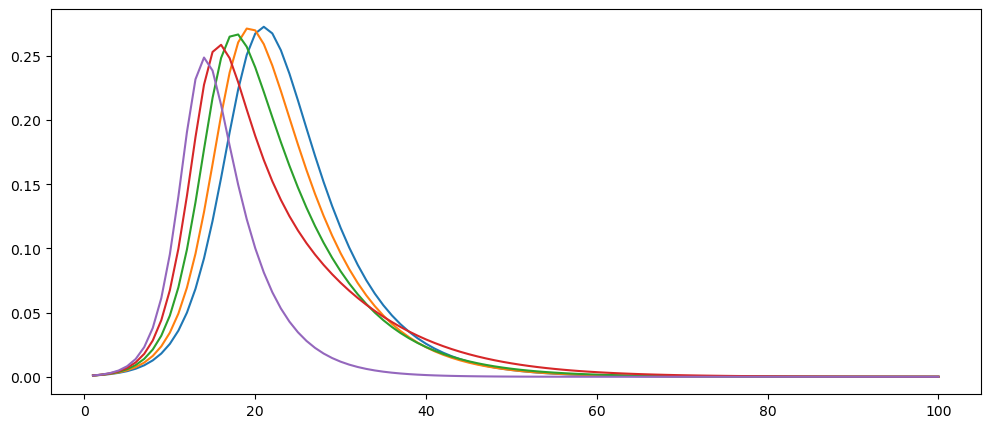

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

values_to_match = [0.6, 0.7, 0.8, 0.9, 1.0]

daily_infected_df.alpha = daily_infected_df.alpha.astype(float)
less_daily = daily_infected_df[
    np.isin(daily_infected_df.alpha.round(2), values_to_match)
]


for alpha in less_daily.alpha.round(2).unique():
    temp_df = less_daily[
        np.isclose(less_daily.alpha, alpha)  # Pandas float storage is so annoying
    ]
    print(
        max(temp_df['prop_infected']),
        get_peak_day(temp_df['prop_infected'])
    )

    ax.plot(
        temp_df["day"],
        temp_df["prop_infected"],
#         color=homophily_color_map[alpha],
        label=alpha,
    )

## Five days

0.2728097589426456 20
0.27142267509699836 18
0.26681623359493567 17
0.2587480766646376 15
0.2488412442759953 13

## Seven days

0.3779955267217451 19
0.3694120426193369 18
0.3519891959520042 16
0.3271774297991729 15
0.3040596093757084 13